# Installs

In [ ]:
!pip install -q openai
!pip install -q git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.2 MB/s eta 0:00:00


# Imports

In [ ]:
import whisper
import openai
import os

# Transcribe Locally

In [ ]:
def transcribe(model, audio):

    language = 'en'
    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(model.device)
    _, probs = model.detect_language(mel)
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

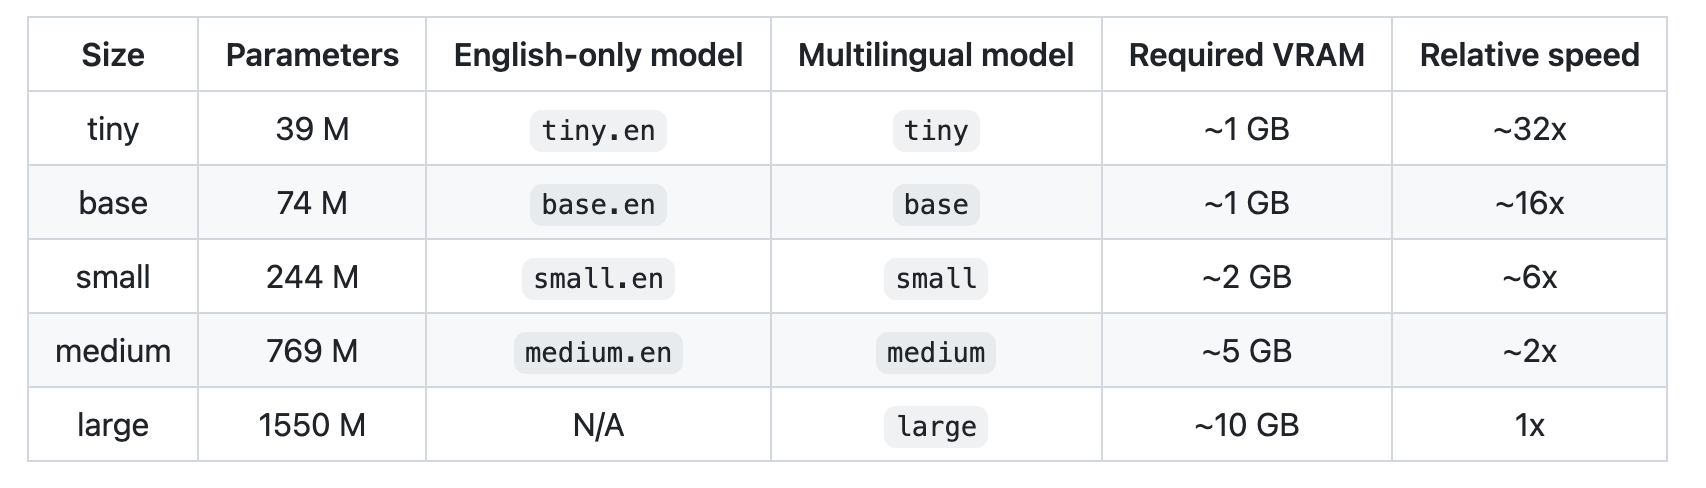

# Tiny Model

In [ ]:
file_name = "File 1.wav"

In [ ]:
tiny_model = whisper.load_model("tiny")
tiny_model.device

100%|█████████████████████████████████████| 72.1M/72.1M [00:01<00:00, 45.3MiB/s]


device(type='cuda', index=0)

In [ ]:
%%time
transcribe(tiny_model, file_name)

CPU times: user 179 ms, sys: 9.18 ms, total: 189 ms
Wall time: 290 ms


'Hello everyone, my name is BhaVage Bhat.'

# Base Model

In [ ]:
base_model = whisper.load_model("base")

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 56.3MiB/s]


In [ ]:
%%time
transcribe(base_model, file_name)

CPU times: user 261 ms, sys: 1 ms, total: 262 ms
Wall time: 381 ms


'Hello everyone, my name is Babesh Bhatt.'

# Small Model

In [ ]:
small_model = whisper.load_model("small")

100%|███████████████████████████████████████| 461M/461M [00:09<00:00, 50.1MiB/s]


In [ ]:
%%time
transcribe(small_model, file_name)

CPU times: user 673 ms, sys: 2.88 ms, total: 676 ms
Wall time: 875 ms


'Hello everyone, my name is Bhavesh Bhatt.'

# Medium Model

In [ ]:
medium_model = whisper.load_model("medium")

100%|█████████████████████████████████████| 1.42G/1.42G [00:26<00:00, 57.7MiB/s]


In [ ]:
%%time
transcribe(medium_model, file_name)

CPU times: user 1.42 s, sys: 5.57 ms, total: 1.42 s
Wall time: 1.9 s


'Hello everyone, my name is Bhavesh Bhatt.'

# Large Model

In [ ]:
large_model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [00:58<00:00, 53.1MiB/s]


In [ ]:
%%time
transcribe(large_model, file_name)

CPU times: user 1.92 s, sys: 23.6 ms, total: 1.94 s
Wall time: 3.55 s


'Hello everyone! My name is Bhavesh Bhatt.'

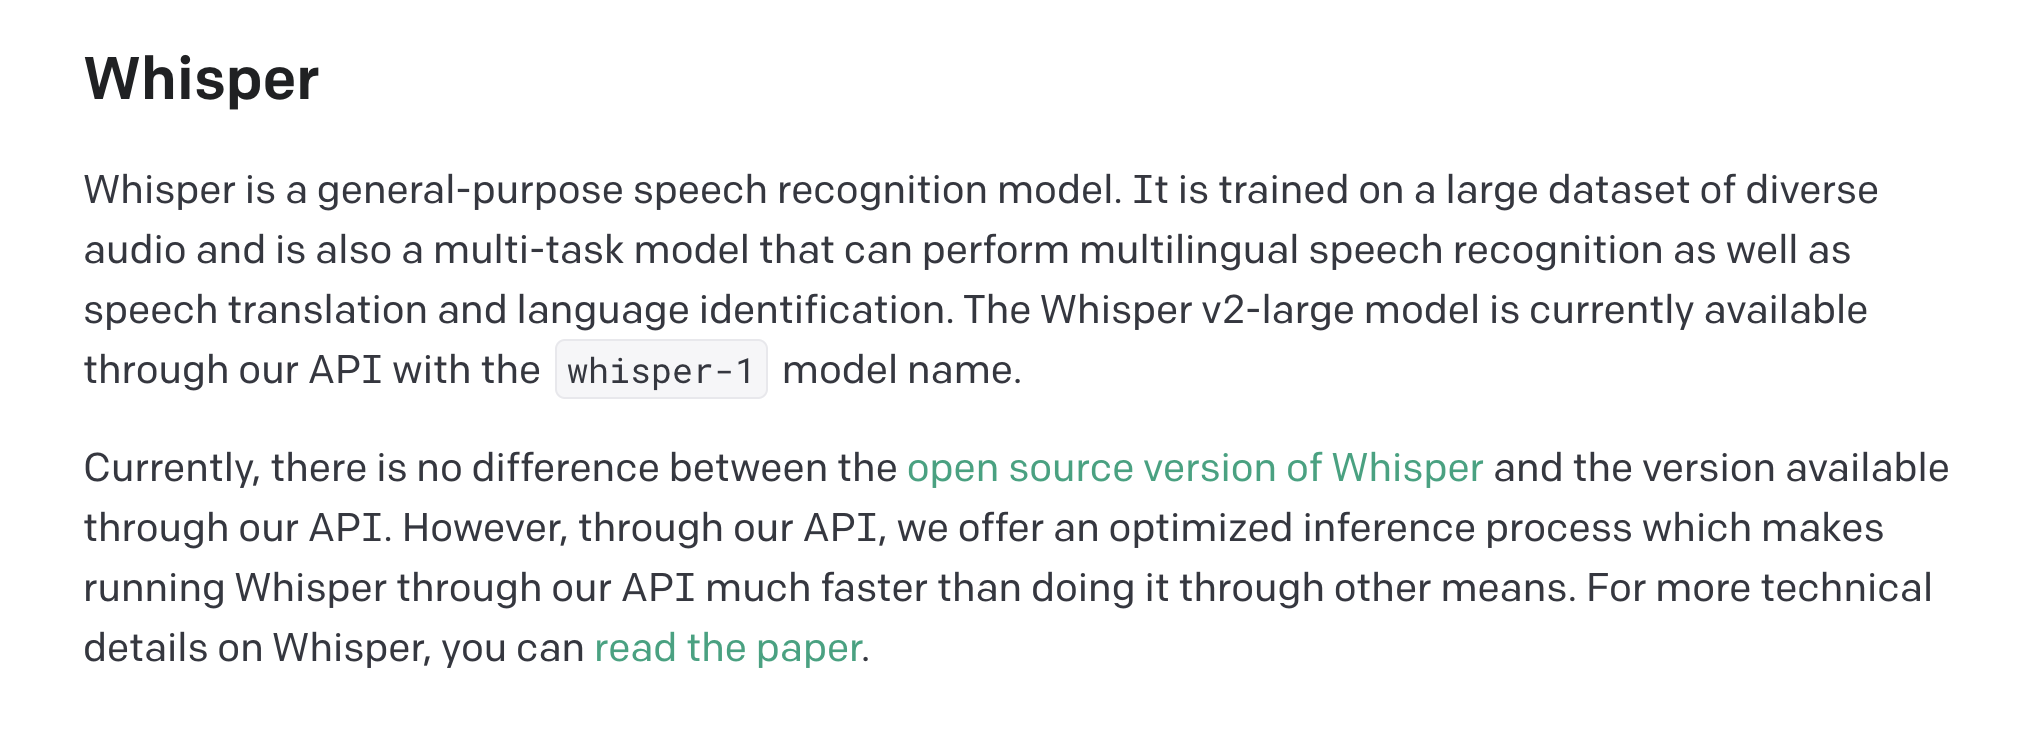

# Transcribe OpenAI's API

In [ ]:
def generate_text(inp_audio):
    API_KEY = 'sk-'
    model_id = 'whisper-1'

    media_file_path = inp_audio
    media_file = open(media_file_path, 'rb')

    response = openai.Audio.transcribe(
        api_key = API_KEY,
        model = model_id,
        file = media_file
    )
    return response['text']

In [ ]:
%%time
generate_text(file_name)

CPU times: user 8.77 ms, sys: 1.59 ms, total: 10.4 ms
Wall time: 955 ms


'Hello everyone! My name is Bhavesh Bhatt.'